# Analysis and Visualization of COVID-19 Data
### Amy Garibaldi
### garibaal@dukes.jmu.edu

![image](https://whatsupnewp.com/wp-content/uploads/2020/03/banner.png)

## Data Source
The data is downloaded from [European Centre for Disease Prevention and Control](https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide).

Coronavirus (COVID-19) is a highly contagious illness that can be spread from person to person or by touching exposed surfaces. Current symptoms reported for patients with COVID-19 include mild to severe respiratory illness with fever, cough, and difficulty breathing. There is currently no vaccine to protect against COVID-19, causing the world to be on lockdown.

## Import Data from S3

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas
import numpy as np

In [2]:
df = pandas.read_excel('s3://isat252gar/COVID-19-geographic-disbtribution-worldwide.xlsx')
df[:10]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,2020-06-10,10,6,2020,542,15,Afghanistan,AF,AFG,37172386.0,Asia
1,2020-06-09,9,6,2020,575,12,Afghanistan,AF,AFG,37172386.0,Asia
2,2020-06-08,8,6,2020,791,30,Afghanistan,AF,AFG,37172386.0,Asia
3,2020-06-07,7,6,2020,582,18,Afghanistan,AF,AFG,37172386.0,Asia
4,2020-06-06,6,6,2020,915,9,Afghanistan,AF,AFG,37172386.0,Asia
5,2020-06-05,5,6,2020,787,6,Afghanistan,AF,AFG,37172386.0,Asia
6,2020-06-04,4,6,2020,758,24,Afghanistan,AF,AFG,37172386.0,Asia
7,2020-06-03,3,6,2020,759,5,Afghanistan,AF,AFG,37172386.0,Asia
8,2020-06-02,2,6,2020,545,8,Afghanistan,AF,AFG,37172386.0,Asia
9,2020-06-01,1,6,2020,680,8,Afghanistan,AF,AFG,37172386.0,Asia


# Sum of all Deaths

In [3]:
total_deaths = df['deaths'].sum()
print("There have been {} recorded deaths globally.".format('411,195'))

There have been 411,195 recorded deaths globally.


(0, 250000)

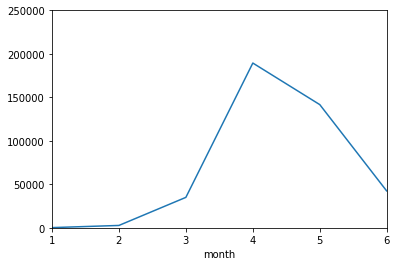

In [4]:
total_deaths = df.groupby('month').sum()['deaths']
total_deaths.plot(); plt.xlim((1,6)); plt.ylim((0,250000))

Evidently, the total number of deaths due to COVID-19 peaked in April (month 4) and has been slowly declining since. The sum of deaths up to June (month 6) has been recorded as 411,195.

# Top 10 Countries with the Highest Deaths

In [5]:
sum_death_by_country = df.groupby('countriesAndTerritories').sum()['deaths']
sum_death_by_country.nlargest(10)

countriesAndTerritories
United_States_of_America    112006
United_Kingdom               40883
Brazil                       38406
Italy                        34043
France                       29296
Spain                        27136
Mexico                       14649
Belgium                       9619
Germany                       8729
Iran                          8425
Name: deaths, dtype: int64

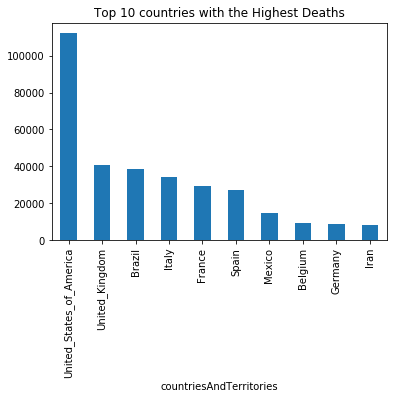

In [6]:
sum_death_by_country = df.groupby('countriesAndTerritories').sum()['deaths']
sum_death_by_country.nlargest(10).plot.bar(title = 'Top 10 countries with the Highest Deaths')

This bar graph exposes the United States as the leading country with the most deaths and Iran as the 10th leading country.

# Percentage of Recovered Globally

In [7]:
df['recovered'] = df['cases']-df['deaths']
df[:10]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp,recovered
0,2020-06-10,10,6,2020,542,15,Afghanistan,AF,AFG,37172386.0,Asia,527
1,2020-06-09,9,6,2020,575,12,Afghanistan,AF,AFG,37172386.0,Asia,563
2,2020-06-08,8,6,2020,791,30,Afghanistan,AF,AFG,37172386.0,Asia,761
3,2020-06-07,7,6,2020,582,18,Afghanistan,AF,AFG,37172386.0,Asia,564
4,2020-06-06,6,6,2020,915,9,Afghanistan,AF,AFG,37172386.0,Asia,906
5,2020-06-05,5,6,2020,787,6,Afghanistan,AF,AFG,37172386.0,Asia,781
6,2020-06-04,4,6,2020,758,24,Afghanistan,AF,AFG,37172386.0,Asia,734
7,2020-06-03,3,6,2020,759,5,Afghanistan,AF,AFG,37172386.0,Asia,754
8,2020-06-02,2,6,2020,545,8,Afghanistan,AF,AFG,37172386.0,Asia,537
9,2020-06-01,1,6,2020,680,8,Afghanistan,AF,AFG,37172386.0,Asia,672


In [8]:
global_recovery_rate= df['recovered'].sum()/df['cases'].sum()*100
print("{} percent of the reported cases globally have already recovered.".format('94.3'))

94.3 percent of the reported cases globally have already recovered.


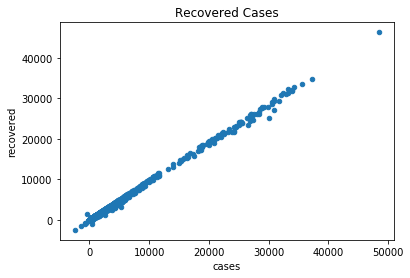

In [9]:
df.plot.scatter(x='cases',y='recovered',title='Recovered Cases')

By subtracting the recorded deaths from the recorded cases, I was able to find the number of recovered cases. With a global recovery rate of 94.3%, this scatter plot shows a positive correlation between number of cases and recovery from COVID-19 despite killing hundreds of thousands. This is because symptoms can range from mild to severe.

# Italy versus United States Recovery Rate

### Italy

In [10]:
italy_recovered = df.loc[df['countriesAndTerritories'] == 'Italy'].sum()['recovered']
italy_cases = df.loc[df['countriesAndTerritories'] == 'Italy'].sum()['cases']
italy_rate = (italy_recovered)/(italy_cases)
print("{} percent of the reported cases in Italy have already recovered.".format('85.5'))

85.5 percent of the reported cases in Italy have already recovered.


### United States

In [14]:
usa_recovered = df.loc[df['countriesAndTerritories'] == 'United_States_of_America'].sum()['recovered']
usa_cases = df.loc[df['countriesAndTerritories'] == 'United_States_of_America'].sum()['cases']
usa_rate = (usa_recovered)/(usa_cases)
print("{} percent of the reported cases in the United States have already recovered.".format('94.3'))

94.3 percent of the reported cases in the United States have already recovered.


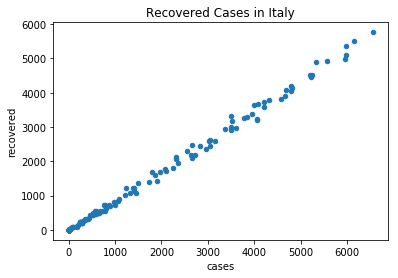

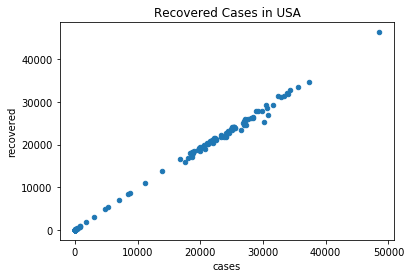

In [12]:
italy_data = df.loc[df['countriesAndTerritories'] == 'Italy']
italy_data[:10]
italy_data.plot.scatter(x='cases',y='recovered', title="Recovered Cases in Italy")

usa_data = df.loc[df['countriesAndTerritories'] == 'United_States_of_America']
usa_data[:10]
usa_data.plot.scatter(x='cases',y='recovered', title="Recovered Cases in USA")

With Italy being roughly 1-2 weeks ahead of the United States' exposure, I wanted to compare their recovery rates. The data shows the U.S to have a higher recovery rate than Italy by 8.8%. However, both scatter plots still confirm both countries have a positive correlation between number of cases and recovery from COVID-19.

# Cases per Continent

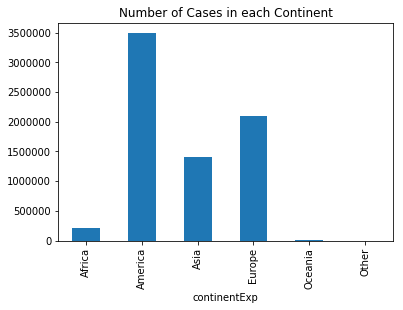

In [21]:
cases_per_continent = df.groupby('continentExp').sum()['cases']
cases_per_continent[:]

cases_per_continent = df.groupby('continentExp').sum()['cases']
cases_per_continent.plot.bar(title= 'Number of Cases in each Continent')

Among the number of cases per continent, the Americas have had the most with 3,488,230 cases. Following the Americas is Europe with roughly 1 million fewer cases.

## Conclusion

With most of the world on lockdown and slowly returning to normal activities, it is important to stay updated on the status of COVID-19. The data provides a wide variety of statistics to understand the impact COVID-19 has had on each country and continent. Some limitations I had while gathering this information was my lack of experience with coding graphs. I would have liked to include some charts comparing only a selection of countries but did not know how to do so. With further research I would like to look into the susceptibility of certain people due to age or underlying conditions. I would also like to report some statistics regarding the contagion of asymptomatic carriers of COVID-19. 